<a href="https://colab.research.google.com/github/hikmatilloahatov/Azarbaijan-supermarkets-data-visualizations/blob/main/X%C4%B1rdalan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019-yil uchun "Xırdalan" supermarketidagi savdo holati


In [29]:
#1 Barcha kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [30]:
#2 Kerakli datasetni githubdan df o'zgaruvchisiga yuklab olaman.
df = pd.read_csv("https://github.com/hikmatilloahatov/Azarbaijan-supermarkets-datasets/blob/main/X%C4%B1rdalan.csv?raw=true", usecols=list(range(1, 6)))
df.head(10)

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,ESTRELLA 500ML PIVE 4.6% D/Q,Pivo,3.95,2019-10-04,False
1,BETA TEA 20X2.5GR BITKI CAY KUSBURNU QUTU,Choy,2.00,2019-10-04,False
2,PRESIDENT 400GR XAMA 10% PL/Q,Smetana,2.67,2019-10-04,False
3,HES 9KG CAMASIR TOZU MATIC BAHAR,Kiyim-kechak uchun,14.99,2019-10-04,False
4,SUPER SUN 300GR AG LOBYA ETLI,Konservalar,2.90,2019-10-04,False
5,KARAMEL SHIRIN LILY FRUTA LIMON KG,Shirinliklar,3.90,2019-10-04,False
6,AIST 200GR BI-O-XI PERSOL BEZ XLORA,"Yuvish vositalari, tozalagichlar",1.55,2019-10-04,False
7,SLAVYANKA 500ML QAZSIZ SU S/Q,Suvlar,0.83,2019-10-04,False
8,NALIBOKI 0.5LT ARAQ BELALFA 40%,Aroq,11.25,2019-07-02,True
9,AQUA MINERAL 2LT QAZSIZ SU,Suvlar,0.80,2019-07-02,True


In [31]:
#3 DataFramening barcha ustunlari haqidagi ma'lumotga ega bo'lib olaman
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mahsulot_nomi   20632 non-null  object 
 1   mahsulot_turi   20632 non-null  object 
 2   mahsulot_narhi  20632 non-null  float64
 3   sotilgan_vaqti  20632 non-null  object 
 4   bonus_karta     20632 non-null  bool   
dtypes: bool(1), float64(1), object(3)
memory usage: 665.0+ KB


In [32]:
#4 DataFrameda NaN qiymatlar bor yoki yo'qligini tekshiraman
df.isnull().sum()

mahsulot_nomi     0
mahsulot_turi     0
mahsulot_narhi    0
sotilgan_vaqti    0
bonus_karta       0
dtype: int64

In [33]:
#5 "sotilgan_vaqti" ustunining ma'lumot turini objectdan datetime ma'lumot turiga o'tkazaman
df['sotilgan_vaqti'] = pd.to_datetime(df['sotilgan_vaqti'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mahsulot_nomi   20632 non-null  object        
 1   mahsulot_turi   20632 non-null  object        
 2   mahsulot_narhi  20632 non-null  float64       
 3   sotilgan_vaqti  20632 non-null  datetime64[ns]
 4   bonus_karta     20632 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), object(2)
memory usage: 665.0+ KB


In [34]:
#6 Har bir oy uchun ma'lumotlar sonini ko'rib olaman
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2038
1978
2120
2074
1960
2118
2180
2037
1908
2190
29
0


In [35]:
#7 Demak tushunamanki, 12-oy uchun hech qanday ma'lumot yo'q, 11-oyda esa bor ammo ma'lumotlar juda oz 
# shuning uchun 11-oydagi ma'lumotlarni tashlab yuborsam bo'laveradi
df.drop(df[df['sotilgan_vaqti'].dt.month == 11].index, axis=0, inplace=True)
for i in range(1, 13):
  print(df[df['sotilgan_vaqti'].dt.month == i].shape[0])

2038
1978
2120
2074
1960
2118
2180
2037
1908
2190
0
0


In [36]:
#8 DataFrameni bir ko'rib olaman
df

,mahsulot_nomi,mahsulot_turi,mahsulot_narhi,sotilgan_vaqti,bonus_karta
0,ESTRELLA 500ML PIVE 4.6% D/Q,Pivo,3.95,2019-10-04,False
1,BETA TEA 20X2.5GR BITKI CAY KUSBURNU QUTU,Choy,2.00,2019-10-04,False
2,PRESIDENT 400GR XAMA 10% PL/Q,Smetana,2.67,2019-10-04,False
3,HES 9KG CAMASIR TOZU MATIC BAHAR,Kiyim-kechak uchun,14.99,2019-10-04,False
4,SUPER SUN 300GR AG LOBYA ETLI,Konservalar,2.90,2019-10-04,False
...,...,...,...,...,...
20627,KONFET SLAV.OREXOVIY TORTIK KG,Shirinliklar,3.60,2019-06-07,True
20628,SIGARET KENO NANO BLACK,Tamaki mahsulotlari,1.80,2019-06-07,True
20629,VITA 1000 200ML MULTI MEYVE SIRESI S/Q,Mevali sharbatlar,0.65,2019-06-07,True
20630,NESTLE 1.5LT PURE LIFE SU,Suvlar,2.35,2019-06-07,True


In [37]:
#9 2019-yilda "Xırdalan" supermarketida qaysi mahsulot turi nechta sotilgani haqida ma'lumotlarni olaman
df['mahsulot_turi'].value_counts().to_frame()

,mahsulot_turi
Shirinliklar,4753
Maishiy buyumlar,1108
"Yuvish vositalari, tozalagichlar",1015
Mevali sharbatlar,959
Idish-tovoq,833
...,...
Suzma,16
Shampan,14
Tayyor ovqatlar,5
Muzlatilgan mahsulotlar,4


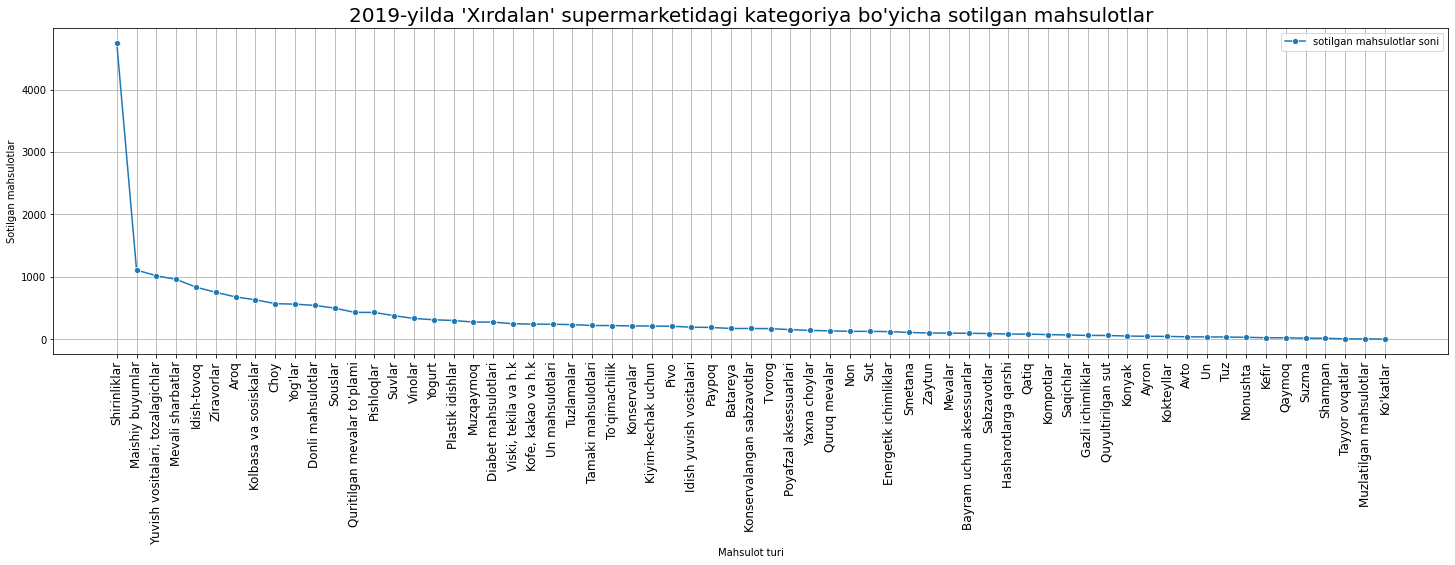

In [38]:
#9 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df['mahsulot_turi'].value_counts().to_frame(), markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Sotilgan mahsulotlar")
plt.title("2019-yilda 'Xırdalan' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlar", fontsize=20)

plt.grid()
plt.legend(["sotilgan mahsulotlar soni"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [39]:
#10 2019-yilda "Xırdalan" supermarketida qaysi mahsulot turi qancha pul olib kelgani haqida ma'lumotni olaman
df.pivot_table(index=['mahsulot_turi'],
              values=['mahsulot_narhi'], 
              aggfunc=['sum'])

,sum
,mahsulot_narhi
mahsulot_turi,
Aroq,10289.45
Avto,198.40
Ayron,31.60
Batareya,819.95
Bayram uchun aksessuarlar,288.12
...,...
Yog'lar,5266.90
Yogurt,380.86


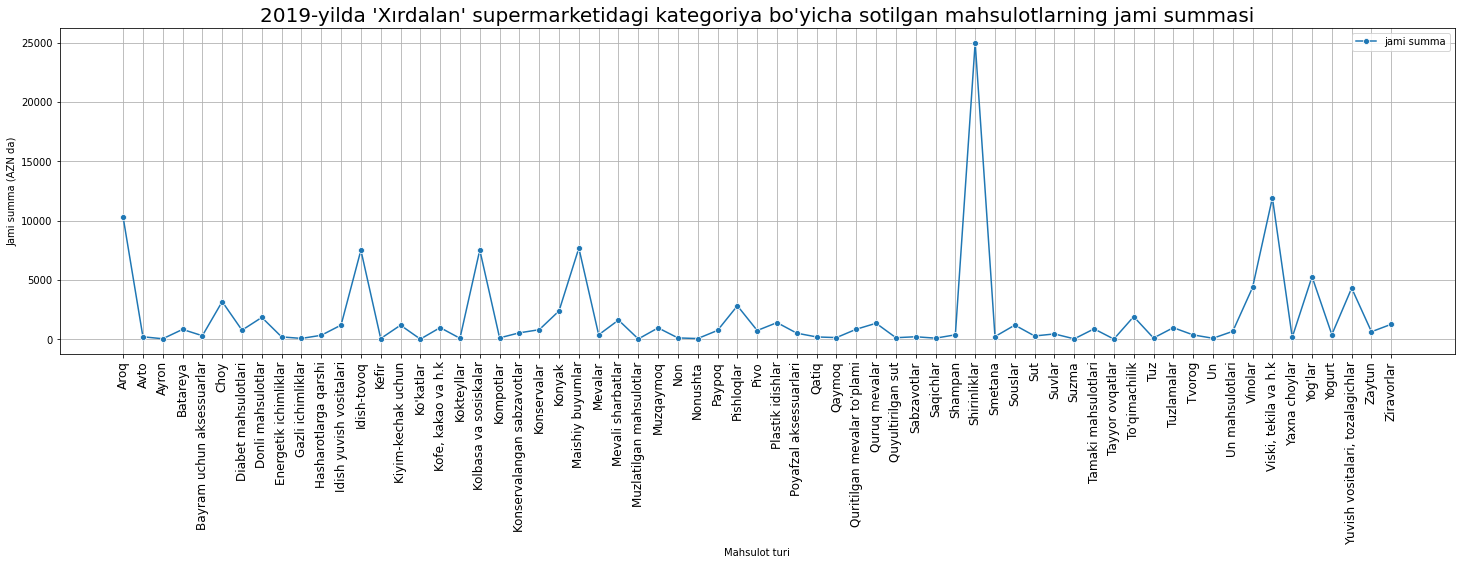

In [40]:
#10 Visualization
plt.figure(figsize=(25, 6))
sns.lineplot(data=df.pivot_table(index=['mahsulot_turi'], values=['mahsulot_narhi'], aggfunc=['sum']),
             markers="o")

plt.xlabel("Mahsulot turi")
plt.ylabel("Jami summa (AZN da)")
plt.title("2019-yilda 'Xırdalan' supermarketidagi kategoriya bo'yicha sotilgan mahsulotlarning jami summasi", fontsize=20)

plt.grid()
plt.legend(["jami summa"])
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [41]:
#11 2019-yilda "Xırdalan" supermarketida nechta mijoz mahsulotni bonus karta orqali 
# xarid qilgan yoki qilmagani haqida haqida ma'lumotni olaman
bonus_df = df['bonus_karta'].value_counts().to_frame().T
bonus_df.columns = ["Bonus_kartasiz", "Bonus_karta_orqali"]
bonus_df.index = pd.Index(['xaridlar'])
bonus_df

,Bonus_kartasiz,Bonus_karta_orqali
xaridlar,10486,10117


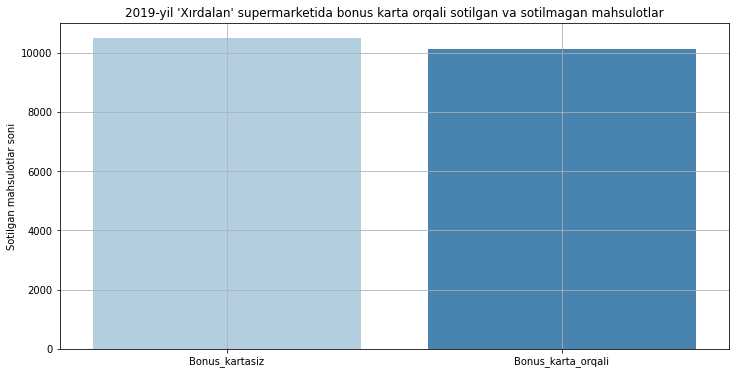

In [42]:
#11 Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=bonus_df, palette="Blues")

plt.title("2019-yil 'Xırdalan' supermarketida bonus karta orqali sotilgan va sotilmagan mahsulotlar")
plt.ylabel("Sotilgan mahsulotlar soni")

plt.grid()
plt.show()

In [43]:
#12 2019-yilda "Xırdalan" supermarketida oylarga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oylik_xaridlar = list()
oy_nomlari = ['Yanvar', 'Fevral', 'Mart', 'Aprel', 'May', 'Iyun', 'Iyul', 'Avgust', 'Sentabr', 'Oktabr']
for i in range(1, 11):
  oylik_xaridlar.append(df[df['sotilgan_vaqti'].dt.month == i].shape[0])
df1 = pd.DataFrame(index=oy_nomlari, data=oylik_xaridlar, columns=['oylik_xaridlar'])
df1

,oylik_xaridlar
Yanvar,2038
Fevral,1978
Mart,2120
Aprel,2074
May,1960
Iyun,2118
Iyul,2180
Avgust,2037
Sentabr,1908
Oktabr,2190


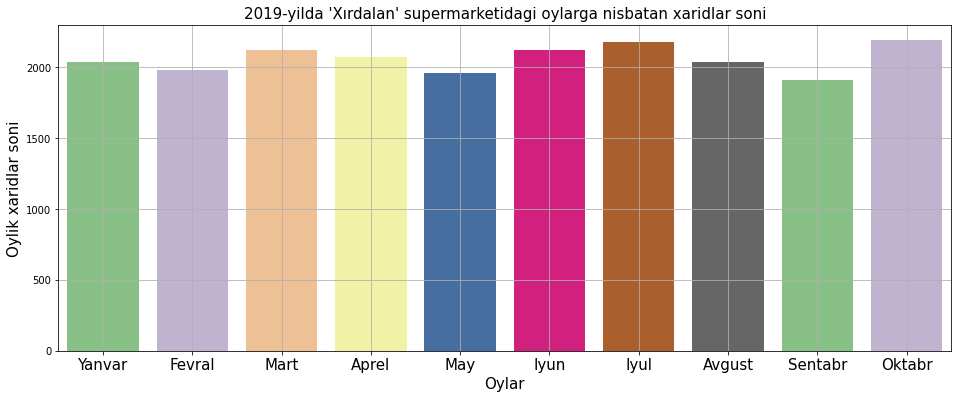

In [44]:
#12 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df1.index, y=df1['oylik_xaridlar'], palette='Accent')

plt.title("2019-yilda 'Xırdalan' supermarketidagi oylarga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oylar", fontsize=15)
plt.ylabel("Oylik xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [45]:
#13 2019-yilda "Xırdalan" supermarketida hafta kunlariga nisbatan xaridlar soni
hafta_kunlari_xaridlar = list()
kun_nomlari = ['Dushanba', 'Seshanba', 'Chorshanba', 'Payshanba', 'Juma', 'Shanba', 'Yakshanba']
for i in range(0, 7):
  hafta_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.weekday == i].shape[0])
df2 = pd.DataFrame(index=kun_nomlari, data=hafta_kunlari_xaridlar, columns=['xaridlar'])
df2

,xaridlar
Dushanba,3013
Seshanba,2982
Chorshanba,3127
Payshanba,2845
Juma,2832
Shanba,2772
Yakshanba,3032


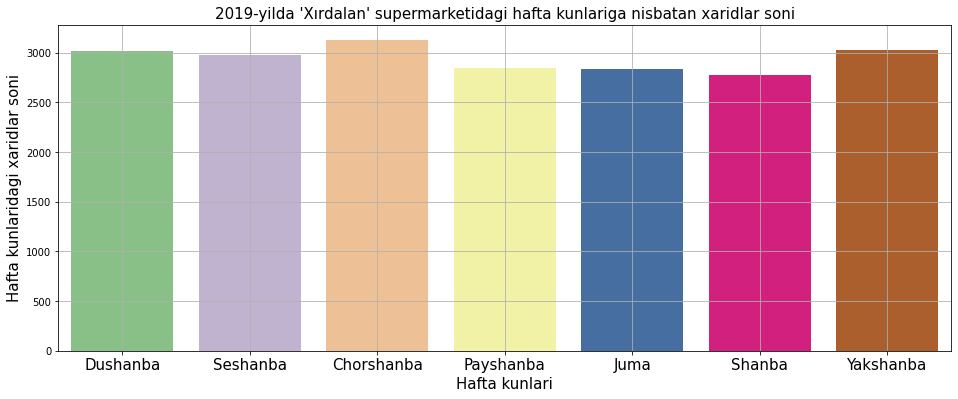

In [46]:
#13 Visualization
plt.figure(figsize=(16, 6))
sns.barplot(x=df2.index, y=df2['xaridlar'], palette='Accent')

plt.title("2019-yilda 'Xırdalan' supermarketidagi hafta kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Hafta kunlari", fontsize=15)
plt.ylabel("Hafta kunlaridagi xaridlar soni", fontsize=15)

plt.xticks(fontsize=15)
plt.grid()
plt.show()

In [47]:
#14 2019-yilda "Xırdalan" supermarketida oy kunlariga nisbatan xaridlar soni haqida ma'lumotlarni aniqlab olaman
oy_kunlari_xaridlar = list()
kunlar = list(range(1, 32))
for i in range(1, 32):
  oy_kunlari_xaridlar.append(df[df['sotilgan_vaqti'].dt.day == i].shape[0])
df3 = pd.DataFrame(index=kunlar, data=oy_kunlari_xaridlar, columns=['xaridlar'])
df3

,xaridlar
1,690
2,681
3,613
4,778
5,608
6,682
7,722
8,713
9,655
10,636


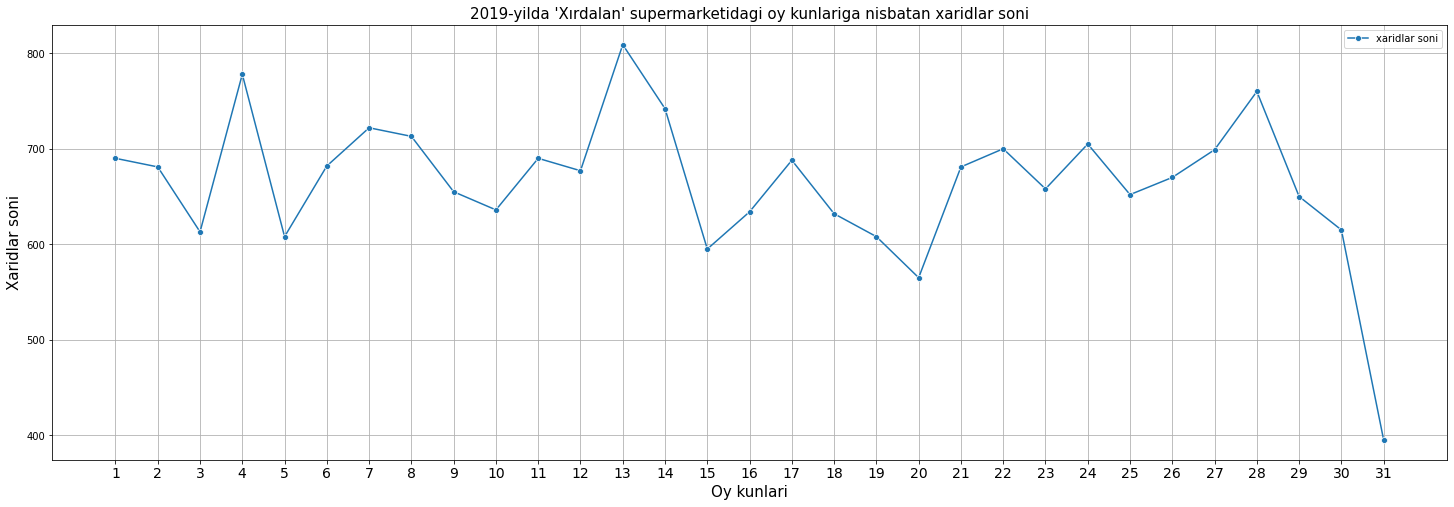

In [48]:
#14 Visualization
plt.figure(figsize=(25, 8))
sns.lineplot(data=df3, markers="o")

plt.title("2019-yilda 'Xırdalan' supermarketidagi oy kunlariga nisbatan xaridlar soni", fontsize=15)
plt.xlabel("Oy kunlari", fontsize=15)
plt.ylabel("Xaridlar soni", fontsize=15)

plt.legend(["xaridlar soni"])
plt.grid()
plt.xticks(kunlar, fontsize=14)
plt.show()

In [49]:
#15 2019-yil 'Xırdalan' supermarketidagi har bir oyning har bir kunidagi xaridlar sonini aniqlab olaman
# buning uchun while loopdan foydalandim
oy_sanalari = list()
oy = 1
kun = 1
while kun<=31 and oy<=10:
    oy_sanalari.append(df[(df['sotilgan_vaqti'].dt.month == oy) & (df['sotilgan_vaqti'].dt.day == kun)].shape[0])
    kun +=1
    if kun == 32:
        oy+=1
        kun=1

In [50]:
len(oy_sanalari)

310

In [51]:
arr = np.array(oy_sanalari).reshape(10, 31)

In [52]:
df5 = pd.DataFrame(index=oy_nomlari, data=arr, columns=list(range(1, 32)))

In [53]:
df5

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Yanvar,46,83,93,47,51,58,82,81,65,39,73,50,81,80,62,52,60,86,65,66,69,43,46,56,40,68,63,69,65,122,77
Fevral,26,55,63,98,48,62,46,71,58,48,68,66,100,109,88,77,74,74,59,72,73,80,76,76,95,81,66,69,0,0,0
Mart,100,71,93,91,64,55,67,46,83,65,63,76,68,69,38,69,68,92,41,46,35,66,93,93,49,57,73,82,82,55,70
Aprel,85,66,60,76,89,80,87,103,81,88,66,54,70,39,38,44,70,39,71,49,58,67,111,59,64,74,90,72,72,52,0
May,108,40,46,70,29,45,86,79,70,82,64,68,61,79,52,44,51,48,61,38,95,71,36,53,46,63,47,92,71,65,100
Iyun,50,126,72,81,92,85,43,67,73,61,58,65,77,63,80,65,40,66,37,48,94,81,42,75,75,114,75,71,80,62,0
Iyul,63,63,46,77,62,102,108,78,54,90,43,35,82,63,62,69,80,61,88,63,30,81,102,104,77,77,31,83,68,81,57
Avgust,85,73,30,83,82,46,53,35,62,44,69,125,120,43,59,56,66,65,80,92,64,103,29,81,67,44,70,55,91,42,23
Sentabr,82,57,45,43,46,66,62,87,16,67,102,88,76,105,45,63,79,38,51,26,52,88,61,70,73,46,81,89,74,30,0
Oktabr,45,47,65,112,45,83,88,66,93,52,84,50,74,92,71,95,100,63,55,65,111,20,62,38,66,46,103,78,47,106,68


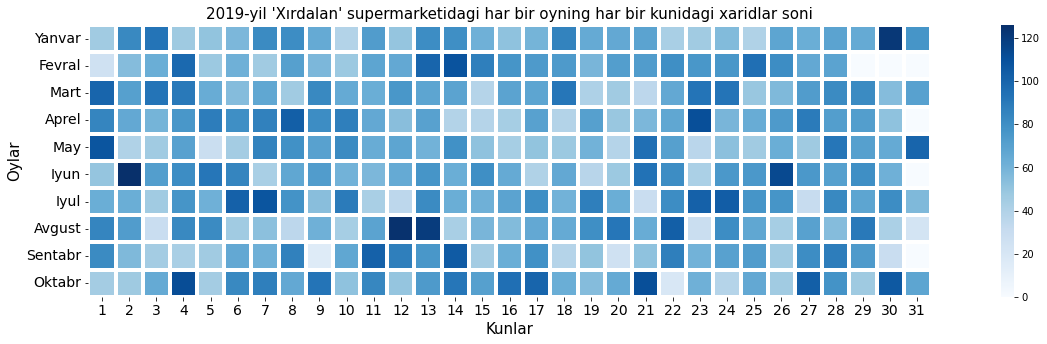

In [54]:
#15 Visualisation
plt.figure(figsize=(25, 5))
sns.heatmap(data=df5, linewidth=3, cmap="Blues", square=True)

plt.title("2019-yil 'Xırdalan' supermarketidagi har bir oyning har bir kunidagi xaridlar soni", fontsize=15)
plt.xlabel("Kunlar", fontsize=15)
plt.ylabel("Oylar", fontsize=15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

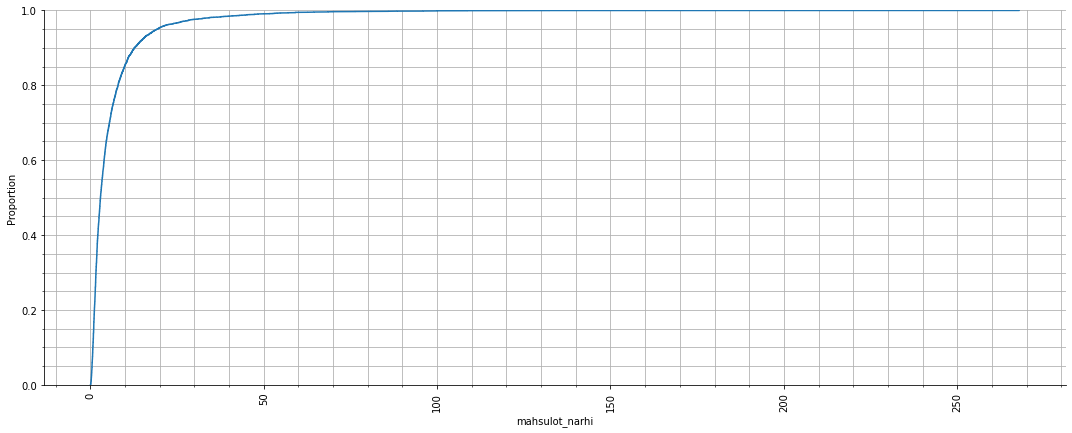

In [55]:
#16 Ko'rinadiki, sotilgan mahsulotlarning 50% i 3 azngacha, 90% i esa 12 azngacha bo'lgan mahsulotlar
sns.displot(data=df, x='mahsulot_narhi', kind='ecdf', height=6, aspect=2.5)
plt.xticks(rotation=90)
plt.grid(which='both')
plt.minorticks_on()
plt.show()